In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [5]:
import os

In [13]:
directory = r"C:\Users\lubna\OneDrive\Documents\OASIS\spam"
files_in_directory = os.listdir(directory)

In [7]:
print(files_in_spam_directory)

['spam.csv']


In [15]:
if 'spam.csv' in files_in_directory:
    file_path = os.path.join(directory, 'spam.csv')
    data = pd.read_csv(file_path, encoding='ISO-8859-1')
    print("Dataset loaded successfully.")
else:
    print('The file "spam.csv" is not present in the directory. Please check the file name and extension.')

Dataset loaded successfully.


In [16]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None


In [17]:
print(data.describe())

          v1                      v2  \
count   5572                    5572   
unique     2                    5169   
top      ham  Sorry, I'll call later   
freq    4825                      30   

                                               Unnamed: 2  \
count                                                  50   
unique                                                 43   
top      bt not his girlfrnd... G o o d n i g h t . . .@"   
freq                                                    3   

                   Unnamed: 3 Unnamed: 4  
count                      12          6  
unique                     10          5  
top      MK17 92H. 450Ppw 16"    GNT:-)"  
freq                        2          2  


In [18]:
print(data.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [19]:
print(data.isnull().sum())

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64


In [20]:
data = data[['v1', 'v2']]

data = data.dropna()

In [21]:
print(data['v1'].value_counts())

v1
ham     4825
spam     747
Name: count, dtype: int64


In [25]:
import string
from nltk.tokenize import word_tokenize

In [32]:
import string
import nltk
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [35]:
data['v2'] = data['v2'].apply(lambda x: [token.lower() for token in x])

In [36]:
data['v2'] = data['v2'].apply(lambda x: ' '.join([token.translate(str.maketrans('', '', string.punctuation)) for token in x]))

In [37]:
X_train, X_test, y_train, y_test = train_test_split(data['v2'], data['v1'], test_size=0.2, random_state=42)

In [38]:
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [39]:
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

MultinomialNB()

In [40]:
predictions = model.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.9542600896860987
Classification Report:
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       965
        spam       1.00      0.66      0.80       150

    accuracy                           0.95      1115
   macro avg       0.97      0.83      0.88      1115
weighted avg       0.96      0.95      0.95      1115



In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

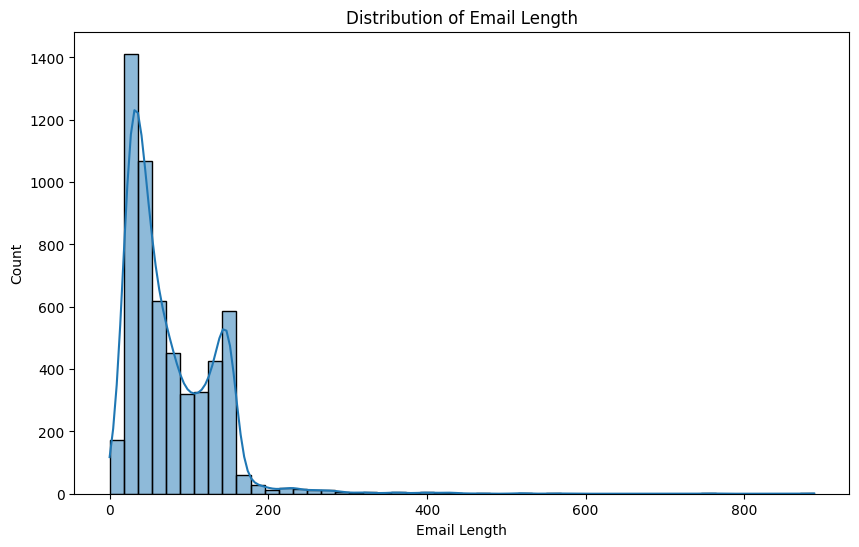

In [42]:
data['email_length'] = data['v2'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(data['email_length'], bins=50, kde=True)
plt.title('Distribution of Email Length')
plt.xlabel('Email Length')
plt.ylabel('Count')
plt.show()

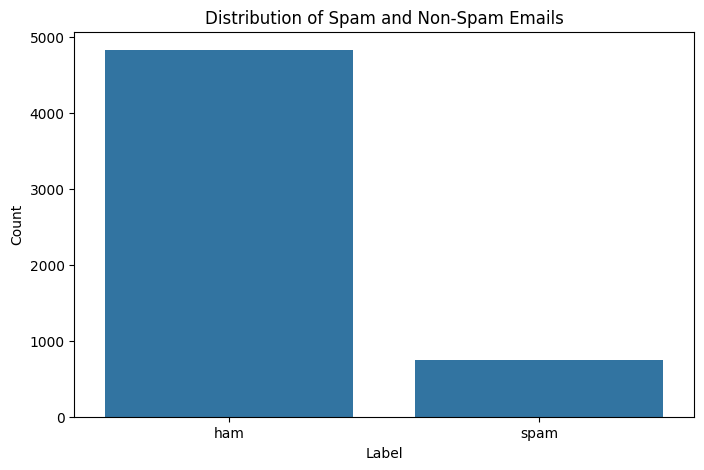

In [43]:
plt.figure(figsize=(8, 5))
sns.countplot(x='v1', data=data)
plt.title('Distribution of Spam and Non-Spam Emails')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()